In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.linear_model import LinearRegression, SGDRegressor

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [4]:
X = 6 * np.random.rand(200 , 1) - 3 
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

## y = 0.80x^2 + 0.9x + 2

Text(0, 0.5, 'y')

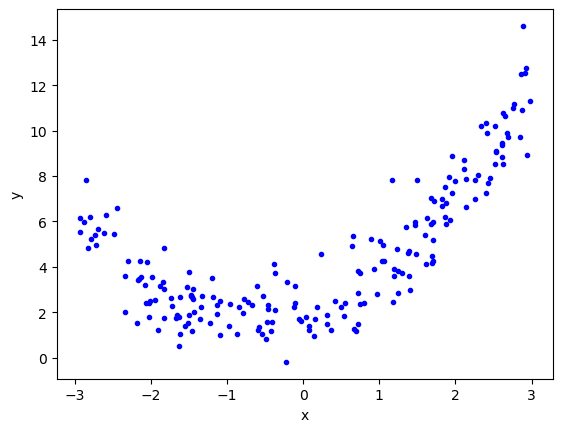

In [ ]:
plt.plot(X,y, 'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
lr = LinearRegression()

In [9]:
lr.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = lr.predict(X_test)
print("R^2 score: ", r2_score(y_test, y_pred))

R^2 score:  0.32746406935589


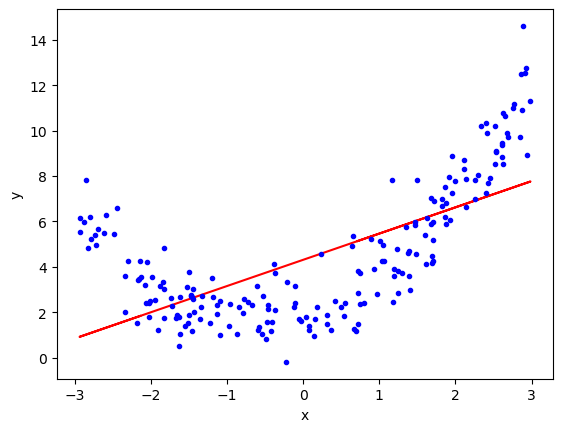

In [14]:
plt.plot(X_train, lr.predict(X_train), 'r-')
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [15]:
poly = PolynomialFeatures(degree=2, include_bias=True)

X_train_tran = poly.fit_transform(X_train)
X_test_tran = poly.transform(X_test)

In [16]:
print(X_train[0])
print(X_train_tran[0])

[-2.14040371]
[ 1.         -2.14040371  4.58132804]


In [17]:
lr = LinearRegression()

In [18]:
lr.fit(X_train_tran, y_train)

LinearRegression()

In [20]:
y_pred = lr.predict(X_test_tran)
print("R2 score: ", r2_score(y_test, y_pred))

R2 score:  0.9012619969868425


In [21]:
print(lr.intercept_, lr.coef_)

[1.9590277] [[0.         0.95222266 0.78553581]]


In [22]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

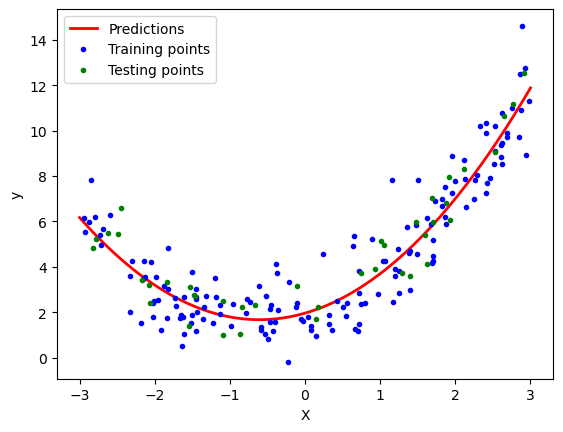

In [23]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
## Over fitting and underfitting are there